In [4]:
from clustering import HierarchicalClustering
import csv
import pandas as pd

original_observation_fact = "data/original/observation_fact.csv"
original_patient_dimension = "data/original/patient_dimension.csv"

output_observation_fact = "data/output/observation_fact.csv"
output_patient_dimension = "data/output/patient_dimension.csv"
output_dummy_to_patient = "data/output/dummy_to_patient.csv"

In [5]:
print("Started hierarchical clustering.")

# Creating an instance of the clustering wrapper.
# Need to specify the observation fact path and (optionally) the separator between concept_cd 
# and modifier_cd in the new observation_fact.csv file
clustering_wrapper = HierarchicalClustering(original_observation_fact, concept_modifier_separator="_")

# performing hiearchical clustering
# need to specify the similarity metric and linkage method
clustering_wrapper.perform_HAC_linkage('jaccard', 'average')

# performing k-means and adapting the minimum anonymity set requirements
# need to specify the maximum ratio, the minimum allowed anonymity set and the number of clusters
clustering_wrapper.perform_clustering(max_ratio=20, min_anonymity_set_allowed=1000, n_clusters=2)

print("Finished hierarchical clustering.")

# plotting the histogram and its respective filled version (without generating any dummy)
# clustering_wrapper.plot_histogram_with_dummies_theoretical()

Started hierarchical clustering.
Finished hierarchical clustering.


In [6]:
print("Started dummy generation.")

# performing dummy generation
patient_concepts_matrix_dummies, dummy_to_patient = clustering_wrapper.generate_dummies(True)

Started dummy generation.
("Water filling clusters' labels order: ", array([0, 1]))
('Label ', 0, ' terminated. Iterations: ', 256)
('Label ', 1, ' terminated. Iterations: ', 597)


(9, 13)


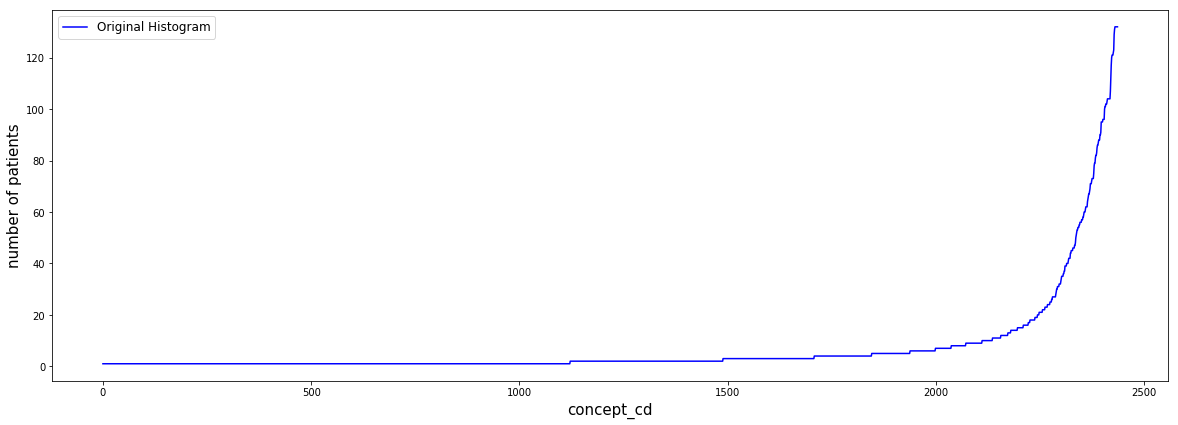

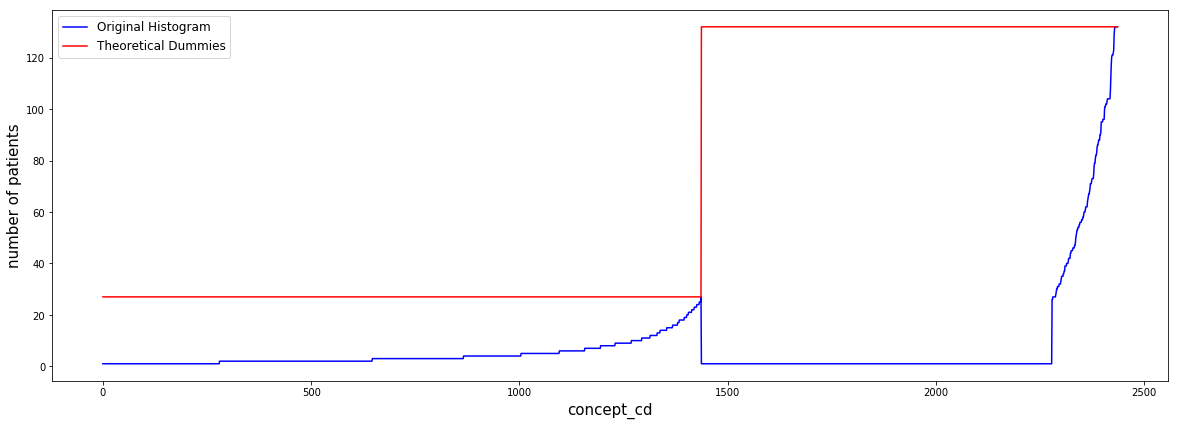

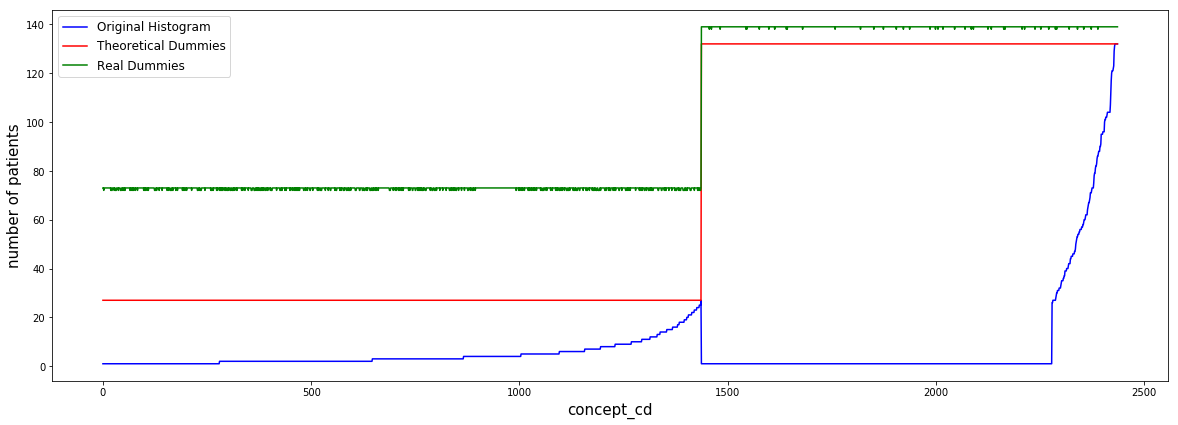

In [4]:
# showing ratios: theoretical vs real
# print(clustering_wrapper.theoretical_ratio(), clustering_wrapper.real_ratio())

# plotting the histograms. Last plot shows the histogram filled with dummies
# clustering_wrapper.plot_histogram()
# clustering_wrapper.plot_histogram_with_dummies_theoretical()
# clustering_wrapper.plot_histogram_with_dummies_real()

In [5]:
# generating the new patient dimension
# need to specify the old patent_dimension.csv path and the new one
clustering_wrapper.generate_patient_dimension(original_patient_dimension, output_patient_dimension)

In [6]:
# generating the new observation fact
# need to specify the old observation_fact.csv and the new one
clustering_wrapper.generate_observation_fact(output_observation_fact)

In [7]:
df = pd.DataFrame(zip(dummy_to_patient.index.values.tolist(), dummy_to_patient.values.tolist()), columns=['dummy', 'patient'])
for col in df.columns:
    df[col] = df[col].astype(str)
df.to_csv(output_dummy_to_patient, quoting=csv.QUOTE_NONNUMERIC, index=False)

print("Finished dummy generation.")